In [1]:

import numpy as np
import scipy as sp
import scipy.linalg as spl
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.sparse.linalg as sspl

In [45]:
def A(dz,N):
    N = N-2
    tmp = -1/(dz**2)*np.ones((N-1))
    diag = 2/(dz**2)*np.ones(N)
    diag[0] = diag[0]/2
    diag[-1] = diag[-1]/2
    return sps.diags((tmp,diag,tmp),(-1,0,1))

def source(Z):
    return np.exp(-0.5*((Z-5)**2)/2**2)

def get_r(Z,rmax,s,theta):
    return rmax - s*(Z-theta)**2

def get_rho(dz,U):
    return dz*(U[0]/2 + U[-1]/2 + np.sum(U[1:-1]))

def solve_explicit(A,U,Z,dz,dt):
    r = get_r(Z, r_max, s, theta)
    rho = get_rho(dz,U)
    tmp1 = sps.eye(A.shape[0])
    tmp2 = dt*A
    tmp3 = np.diag((dt*(r-kappa*rho))[1:-1])
    U_next = (tmp1 + tmp2+tmp3).dot(U)
    return U_next

In [29]:
kappa = 1
s = 1
r_max = 1
sigma = 0.4
theta = 4

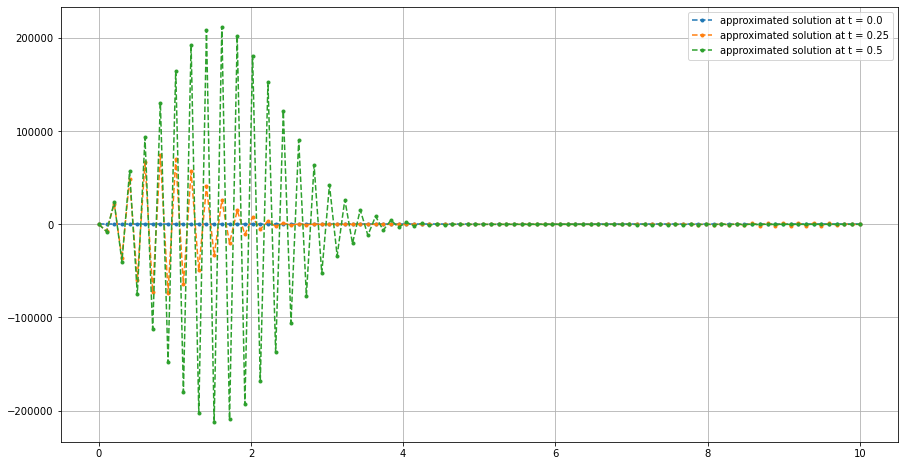

In [51]:
N = 100
a = 0
b = 10
dz = (b-a)/N
dt = 0.002
T = 0.5
nbT = int(T/dt)
fig = plt.figure(figsize = (15,8))
Z = np.linspace(a,b,N)
U = np.zeros(N)
U[1:-1] = np.copy(source(Z[1:-1]))
U[0] = U[1]
U[-1] = U[-2]
for i in range(nbT+1):
    if i % ((nbT)/2) == 0:
        plt.plot(Z,U, ".--", label = "approximated solution at t = {0}".format(i*dt))
    U[1:-1] = np.copy(solve_explicit(A(dz,N),U[1:-1],Z,dz,dt))
plt.legend()
plt.grid()
plt.show()